## Importing Packages

- ***pandas***: Used for data manipulation and analysis. It provides data structures like DataFrame, which are ideal for handling structured data.
  
- ***numpy***: Useful for numerical computations, such as working with arrays and mathematical functions.
  
- ***matplotlib.pyplot***: A plotting library for creating static, interactive, and animated visualizations in Python.
  
- ***seaborn***: Built on top of matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.
  
- ***sklearn.model_selection***: Includes tools like train_test_split, which splits data into training and testing sets, useful in machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

**Load the Data set**

In [2]:
iries_df=pd.read_csv('Iris.csv')
iries_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


- ***Categorical Columns***: These columns contain non-numeric data, usually representing categories or labels.

- ***Numerical Columns***: These columns contain numeric values, and you can perform mathematical operations on them.

In [30]:
cat=iries_df.select_dtypes(include='object').columns
num=iries_df.select_dtypes(exclude='object').columns
cat

Index([], dtype='object')

In [31]:
num

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

$Columns$

In [4]:
iries_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

$Shape$

In [5]:
iries_df.shape

(150, 6)

$dtypes$

This will return the data type of each column in the iris_df DataFrame. For example, you might see something like:

- float64 for numerical columns (e.g., SepalLengthCm, PetalWidthCm).

- object for categorical columns (e.g., Species).

In [6]:
iries_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

$isnull$

- checks for null values


In [7]:
iries_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

$info$

This will display the following information:

- ***RangeIndex***: Total number of rows.

- ***Columns***: Names of each column in the DataFrame.

- ***Non-null count***: The number of non-null entries for each column.

- ***Data type***: The data type of each column (e.g., int64, float64, object).

- ***Memory usage***: The memory usage of the DataFrame.

In [8]:
iries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


$drop$

- ***drop()***: This method is used to remove rows or columns from a DataFrame.

- ***'Id'***: The column to be removed, specified by its name.

- ***axis=1***: Specifies that a column is being dropped (for rows, axis=0 would be used).

- ***inplace=True***: Ensures that the operation is done directly on the original DataFrame,

  modifying it in place. Without inplace=True,

   the result would need to be assigned to a new variable.

In [9]:
iries_df.drop('Id',axis=1,inplace=True)

In [10]:
cat=iries_df.select_dtypes(include='object').columns
num=iries_df.select_dtypes(exclude='object').columns

### Finding unique lables in each column using ***unique***

In [11]:
for i in iries_df:
    print(f"{i} unique lables:{iries_df[i].unique()}")

SepalLengthCm unique lables:[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
SepalWidthCm unique lables:[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
PetalLengthCm unique lables:[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
PetalWidthCm unique lables:[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Species unique lables:['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#### Frequency Table

In [12]:
keys=iries_df['Species'].value_counts().keys()
values=iries_df['Species'].value_counts().values

df=pd.DataFrame(zip(keys,values),columns=['lables','Count'])
df.to_csv("Frequency table")

## data Visualiation

### Bar plot

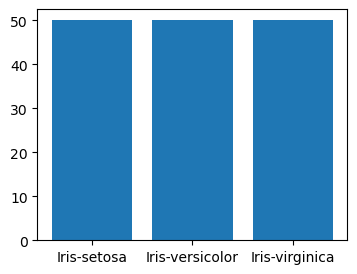

In [33]:
plt.figure(figsize=(4,3))
plt.bar(keys,values)
plt.show()

### pie

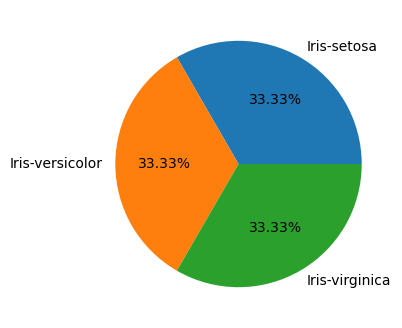

In [14]:
plt.figure(figsize=(5,4))
plt.pie(values,
       labels=keys,
       autopct='%0.2f%%',
       radius=1)
plt.show()

<Figure size 200x200 with 0 Axes>

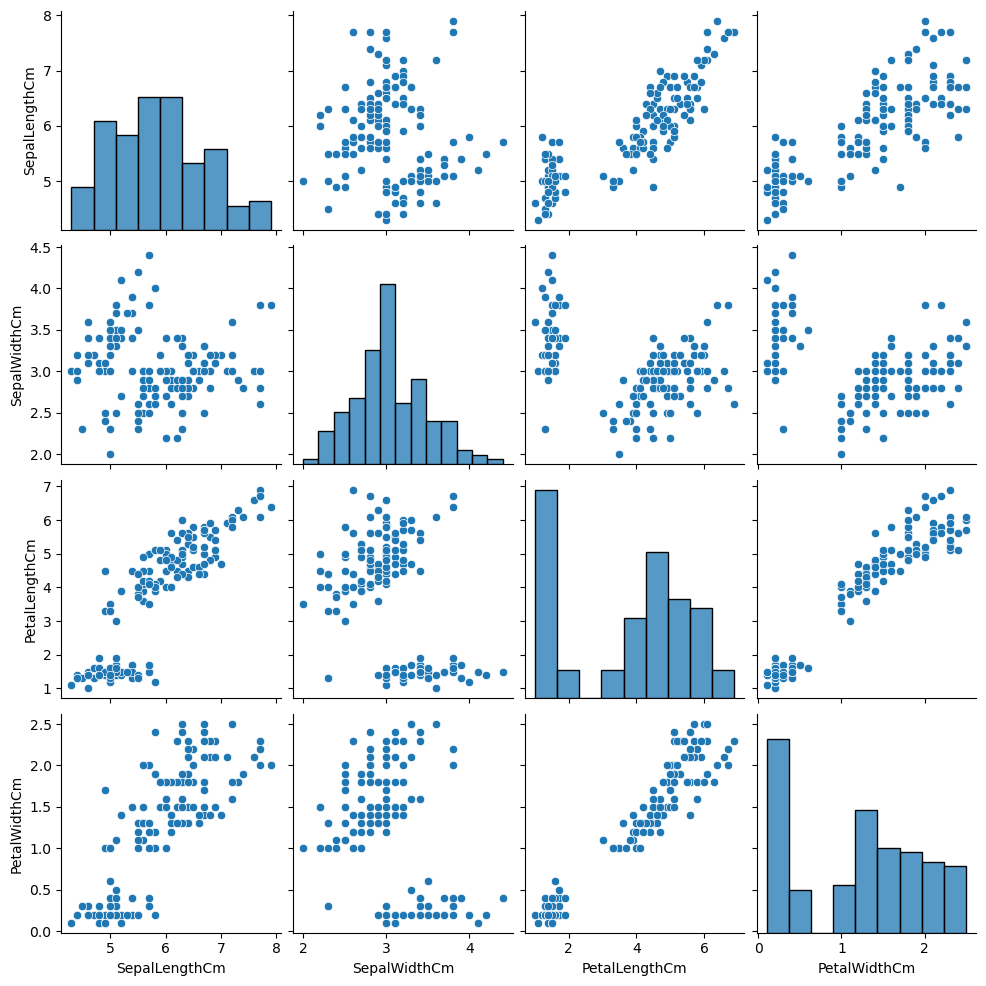

In [15]:
plt.figure(figsize=(2,2))
sns.pairplot(iries_df)

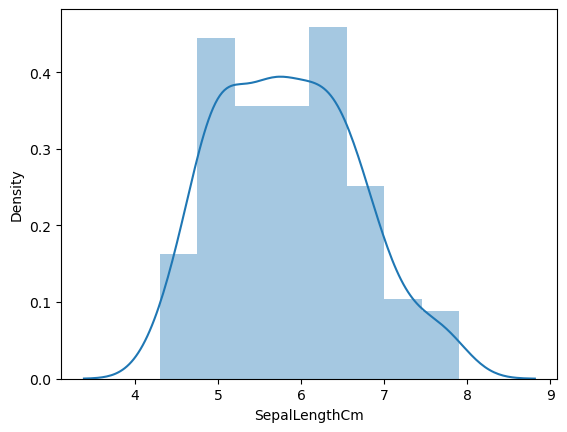

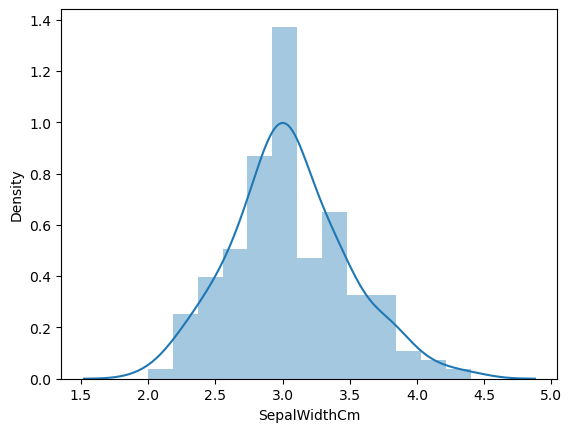

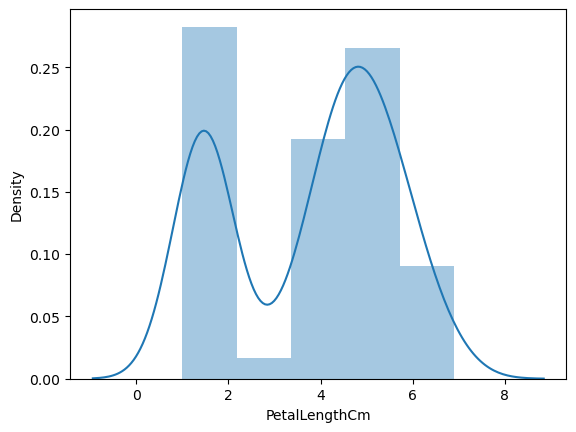

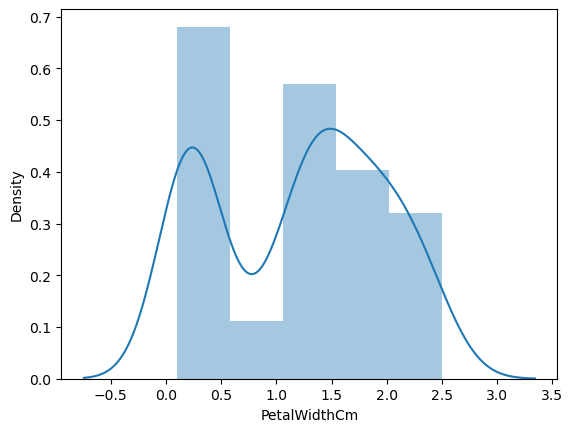

In [16]:
sns.distplot(iries_df['SepalLengthCm'])
plt.show()

sns.distplot(iries_df['SepalWidthCm'])
plt.show()

sns.distplot(iries_df['PetalLengthCm'])
plt.show()

sns.distplot(iries_df['PetalWidthCm'])
plt.show()

### histogram and box plot

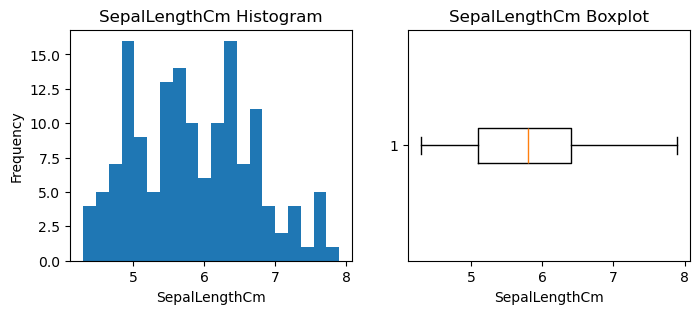

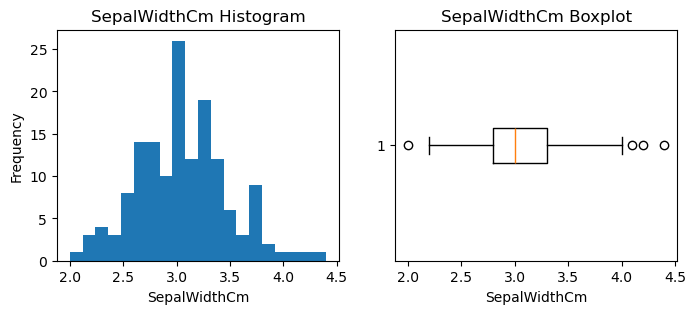

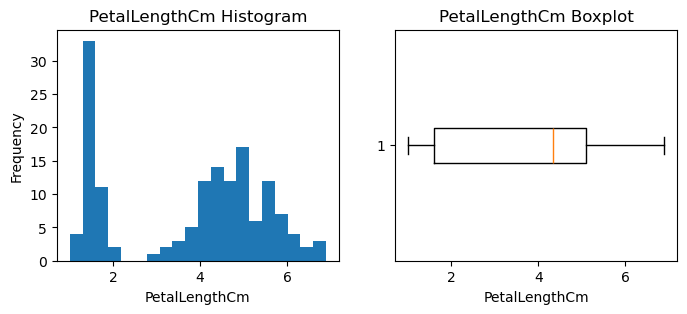

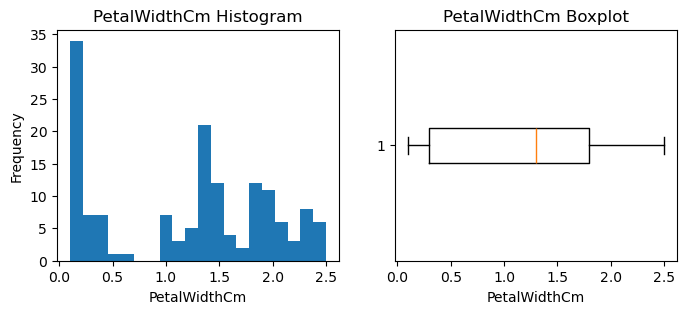

In [17]:
import matplotlib.pyplot as plt

for i in num:
    plt.figure(figsize=(8, 3))

    plt.subplot(1, 2, 1)
    plt.hist(iries_df[i], bins=20)
    plt.title(f"{i} Histogram")
    plt.xlabel(i)
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.boxplot(iries_df[i], vert=False)
    plt.title(f"{i} Boxplot")
    plt.xlabel(i)
    plt.show()


***"By looking at the above box plot, we can see that there are not many outliers. Let's verify this by using code."***








In [18]:
#step-1 : calculate q1 and q3
for i in num:
    q1=np.quantile(iries_df[i],0.25)
    q3=np.quantile(iries_df[i],0.75)
    
    #step-2:calcule IQR=q3-q1
    IQR=q3-q1
    
    #step-3:lb=q1-1.5*IQR
    lb=q1-1.5*IQR
    
    #step-4:ub=q3+1.5*IQR
    ub=q3+1.5*IQR
    
    #step-5:con1=data<lb
    con1=iries_df[i]<lb
    
    #step-6:con2=data>ub
    con2=iries_df[i]>ub
    
    #step-7:con3=con1<or(|)>con2
    con3=con1 | con2
    
    #step-8:data[con3]
    count=len(iries_df[con3]) #427
    print(f"outlier data {i} is {count}")

outlier data SepalLengthCm is 0
outlier data SepalWidthCm is 4
outlier data PetalLengthCm is 0
outlier data PetalWidthCm is 0


"Since there are very few outliers, no outlier treatment is needed."

The describe() method in pandas provides a statistical summary of the numerical columns in the DataFrame.

When you use iries_df.describe(), it will return the following summary statistics for each numerical column:

- ***count***: The number of non-null entries.

- ***mean***: The average value of the column.

- ***std***: The standard deviation, which measures the spread of the data.

- ***min***: The minimum value in the column.

- ***25%***: The 25th percentile, or the first quartile (Q1).

- ***50%***: The median or 50th percentile (Q2).

- ***75%***: The 75th percentile, or the third quartile (Q3).

- ***max***: The maximum value in the column.

In [19]:
iries_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
corr=iries_df.corr(numeric_only=True)
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Correlation Heatmap of the Iris Dataset








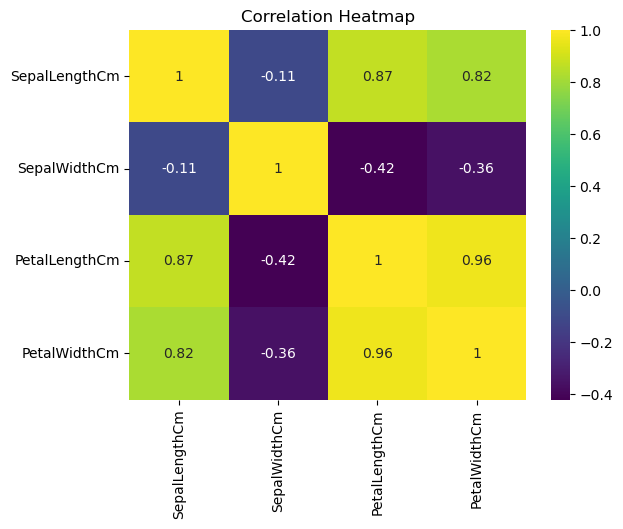

In [21]:
corr=iries_df.corr(numeric_only=True)
sns.heatmap(corr,annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

### Encoding Data

In [22]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for i in cat:
    iries_df[i]=lb.fit_transform(iries_df[i])

iries_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
X=iries_df.drop('Species',axis=1)
y=iries_df['Species']

### feature Selection

In [24]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
# Threshold variance value
# we want
vt.fit(X)
vt.get_feature_names_out()
cols=vt.get_feature_names_out()
X=X[cols]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### train test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## PCA and Model development

In [39]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_pca, y_train)

# Predict using the model
y_pred_pca = knn.predict(X_test_pca)

# Evaluate the accuracy
pca_accuracy = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy: {pca_accuracy}')


Accuracy: 1.0


### Saving and Loading the KNN Model and PCA Transformer

In [40]:
import pickle

with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)
    
# Save the PCA transformer (important for consistent data transformation)
with open('pca_transformer.pkl', 'wb') as file:
    pickle.dump(pca, file)

# Loading the saved model and PCA transformer


In [42]:
with open('knn_model.pkl', 'rb') as file:
    loaded_knn = pickle.load(file)
    
with open('pca_transformer.pkl', 'rb') as file:
    loaded_pca = pickle.load(file)

**Modelevaluation**

In [43]:
X_test_pca_loaded = loaded_pca.transform(X_test)
y_pred_pca_loaded = loaded_knn.predict(X_test_pca_loaded)

loaded_pca_accuracy = accuracy_score(y_test, y_pred_pca_loaded)
print(f'Accuracy using loaded model: {loaded_pca_accuracy}')


Accuracy using loaded model: 1.0


In [51]:
# Prompt the user to input the feature values
sepal_length = float(input("Enter Sepal Length (cm): "))
sepal_width = float(input("Enter Sepal Width (cm): "))
petal_length = float(input("Enter Petal Length (cm): "))
petal_width = float(input("Enter Petal Width (cm): "))

# Create a NumPy array for the input data
input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

# Transform the input data using PCA
input_data_pca = pca.transform(input_data)

# Make a prediction using the KNN model
prediction = knn.predict(input_data_pca)
species_names = ['Setosa', 'Versicolor', 'Virginica']
predicted_species = species_names[int(prediction[0])]  # Ensure prediction is treated as an integer

print(f"Predicted Species: {predicted_species}")

Enter Sepal Length (cm):  1
Enter Sepal Width (cm):  2
Enter Petal Length (cm):  3
Enter Petal Width (cm):  4


Predicted Species: Versicolor
